In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
pd.set_option("display.max_colwidth", None)

In [2]:
# Load data
df = pd.read_csv('../data/all_queries.csv')

In [3]:
df.head()

,date,time,tweet,tweet_id,hashtags,user_id,username,location,num_followers,geo_enabled,long,lat,relevant,neg_sent_score,neu_sent_score,pos_sent_score,compound_sent_score,sent_class
0,11/8/21,17:11:01,"Defender Radio Live: Canid Response Teams and Coexistence Lesley Sampson of Coyote Watch Canada joins Defender Radio Podcast host Michael Howie for a live event and recording in Hamilton, Ontario. https://t.co/jLycjr3Xv7",1.460000e+18,[],9.202440e+08,CoyoteWatchCAN,"Ontario, CA",4420,True,NaN,NaN,0.0,0.000,0.912,0.088,0.2023,positive
1,11/8/21,14:25:52,Yaw 💃💃. Good Morning Twitter Family 🤩✨,1.460000e+18,[],1.460000e+18,coyote_kissa1,"Pasadena, CA",57,False,NaN,NaN,0.0,0.000,0.634,0.366,0.6369,positive
2,11/8/21,12:27:50,"At this moment, I have a neighbor that lives 750 away. He keeps his two Labrador retrievers in a 15’ish square pen with a roof outside at night. How do I know this? Because I came hear them barking. Constantly. \n\nApparently they just won a debate with the coyotes. https://t.co/oJV5Swuc3f",1.460000e+18,[],1.330000e+18,DavidCMaybury,"Perris, CA",438,True,NaN,NaN,1.0,0.000,0.930,0.070,0.5719,positive
3,11/8/21,10:51:07,"@AstroBackyard Had the coyotes barking within a few hundred feet of me in Joshua Tree tonight. I shined a light in their direction to let them know I’m aware of them. Oddly, one sounded like a dog.\n\nWhat freaked me out more were the hikers somewhere in the dark. I just heard foot steps!",1.460000e+18,[],6.883438e+07,darrenreely,"Los Angeles, CA",147,True,NaN,NaN,1.0,0.039,0.912,0.049,0.1511,positive
4,11/8/21,8:28:38,"really just saw a coyote cross the street and stare at me as i drove by 😭😭😭 what the, la habra heights",1.460000e+18,[],2.323440e+09,angeIiques,she/her,109,True,NaN,NaN,1.0,0.256,0.744,0.000,-0.8519,negative


In [4]:
df_example = df[df.relevant == 0]['tweet'].head()
df_example

0                                                                                           Defender Radio Live: Canid Response Teams and Coexistence Lesley Sampson of Coyote Watch Canada joins Defender Radio Podcast host Michael Howie for a live event and recording in Hamilton, Ontario.  https://t.co/jLycjr3Xv7
1                                                                                                                                                                                                                                                                                  Yaw 💃💃. Good Morning Twitter Family 🤩✨
6                                                                                                                                                                                                                                                                                           @shenjonsin but the coyotes !
9                                                         

Looks like saving the queries to csv reduced the accuracy of `tweet_id` and `user_id`. This might be a problem in the future and when I join future queries to this main csv. In the time being, I will join on `tweet`.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 1900 non-null   object 
 1   time                 1900 non-null   object 
 2   tweet                1900 non-null   object 
 3   tweet_id             1900 non-null   float64
 4   hashtags             1900 non-null   object 
 5   user_id              1900 non-null   float64
 6   username             1900 non-null   object 
 7   location             1877 non-null   object 
 8   num_followers        1900 non-null   int64  
 9   geo_enabled          1900 non-null   bool   
 10  long                 8 non-null      float64
 11  lat                  8 non-null      float64
 12  relevant             1900 non-null   float64
 13  neg_sent_score       1900 non-null   float64
 14  neu_sent_score       1900 non-null   float64
 15  pos_sent_score       1900 non-null   f

# Comparing counts of relevant and irrelevant tweets

In [6]:
counts = df.value_counts('relevant')

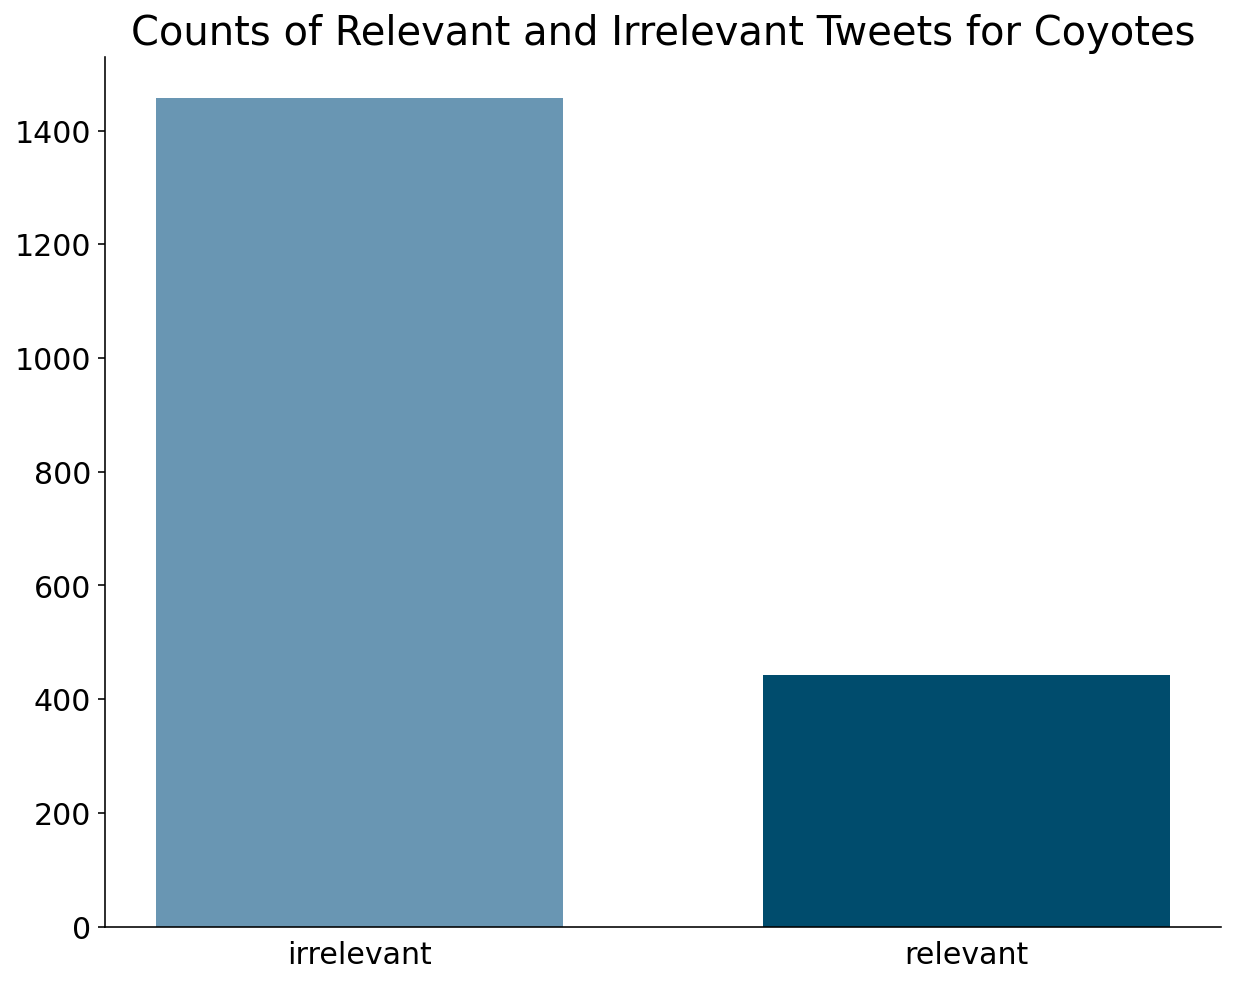

In [7]:
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(['irrelevant', 'relevant'], counts, width=.67, color=['#6996b3', '#004c6d'])
ax.set_title('Counts of Relevant and Irrelevant Tweets for Coyotes', fontsize=20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', bottom=False)
ax.tick_params(axis='both', labelsize=15)

plt.savefig('../images/counts_rel_irrel.png', transparent=True)
plt.show()

# Exploring tweets that are not relevant

In [8]:
df_nr = df[df['relevant'] == 0].copy()

In [9]:
df_nr.shape

(1457, 18)

## Look at the tweets

In [10]:
ir_tweets = df_nr['tweet']
ir_tweets[:5]

0                                                                                           Defender Radio Live: Canid Response Teams and Coexistence Lesley Sampson of Coyote Watch Canada joins Defender Radio Podcast host Michael Howie for a live event and recording in Hamilton, Ontario.  https://t.co/jLycjr3Xv7
1                                                                                                                                                                                                                                                                                  Yaw 💃💃. Good Morning Twitter Family 🤩✨
6                                                                                                                                                                                                                                                                                           @shenjonsin but the coyotes !
9                                                         

### Lets look at the most common words

In [11]:
from utility.text_normalizer import tweet_preprocessor

In [12]:
norm_tweets = [tweet_preprocessor(tweet) for tweet in ir_tweets]
len(norm_tweets)

1457

In [13]:
from collections import Counter
from sklearn.feature_extraction import _stop_words

In [14]:
stop_words = _stop_words.ENGLISH_STOP_WORDS

In [15]:
# Get all the words into one list, lowercase them, and remove stopwords
def filter_tweets(tweets: list) -> list:
    all_words = ' '.join(tweets).split(' ')
    all_words = [w.lower() for w in all_words]
    all_words = [w for w in all_words if w not in stop_words]
    all_words = [w for w in all_words if w not in ['coyotes', 'coyote', 'amp']]  # amp is for ampersand
    return all_words

In [16]:
words = filter_tweets(norm_tweets)

In [17]:
word_count = Counter(words)

In [18]:
# Most common 20 words from irrelevant tweets
common_words = word_count.most_common(20)
common_words

[('like', 128),
 ('just', 83),
 ('new', 60),
 ('wile', 56),
 ('took', 55),
 ('weekend', 55),
 ('news', 55),
 ('saturday', 52),
 ('stories', 52),
 ('sunday', 51),
 ('time', 50),
 ('missed', 48),
 ('norcal', 48),
 ('break', 48),
 ('worry', 48),
 ('rounded', 47),
 ('san', 45),
 ('know', 42),
 ('today', 42),
 ('got', 40)]

### Visualize most common 20 words from irrelevant tweets

In [19]:
irrel_words = []
irrel_counts = []
for current_word, current_count in common_words:
    irrel_words.append(current_word)
    irrel_counts.append(current_count)

irrel_words.reverse()
irrel_counts.reverse()

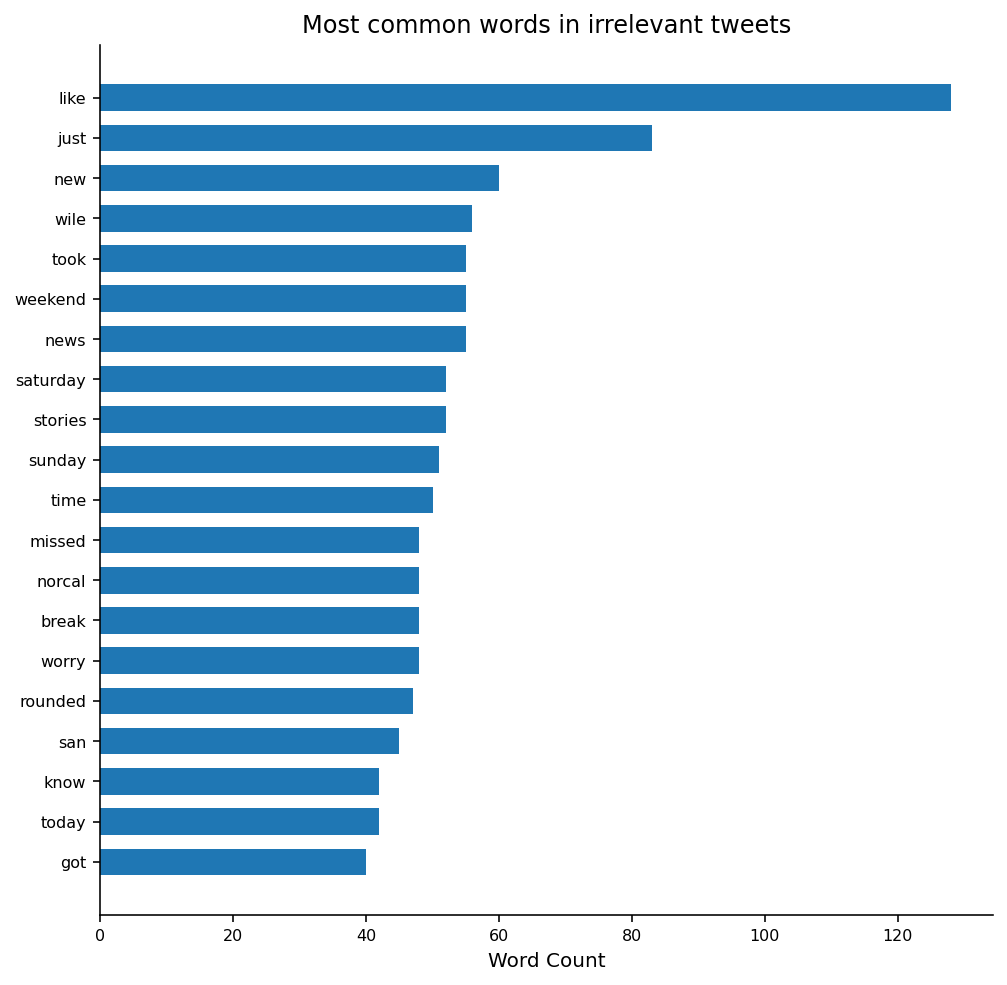

In [20]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.barh(irrel_words, irrel_counts, height=.66)
ax.set_title('Most common words in irrelevant tweets')
ax.set_xlabel('Word Count')
ax.tick_params(axis='both', labelsize=8)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

Based on this plot there are some words we might want to exclude from our twitter api query. These include:
- ducks
- school
- game
- nhl
- win
- arizona
- indian

However, some of these words might be in relevant tweets. Lets take a look at the most common words in relevant tweets.

# Exploring tweets that are relevant

In [21]:
df_rel = df[df['relevant'] == 1].copy()
df_rel.head()

,date,time,tweet,tweet_id,hashtags,user_id,username,location,num_followers,geo_enabled,long,lat,relevant,neg_sent_score,neu_sent_score,pos_sent_score,compound_sent_score,sent_class
2,11/8/21,12:27:50,"At this moment, I have a neighbor that lives 750 away. He keeps his two Labrador retrievers in a 15’ish square pen with a roof outside at night. How do I know this? Because I came hear them barking. Constantly. \n\nApparently they just won a debate with the coyotes. https://t.co/oJV5Swuc3f",1.460000e+18,[],1.330000e+18,DavidCMaybury,"Perris, CA",438,True,NaN,NaN,1.0,0.000,0.930,0.070,0.5719,positive
3,11/8/21,10:51:07,"@AstroBackyard Had the coyotes barking within a few hundred feet of me in Joshua Tree tonight. I shined a light in their direction to let them know I’m aware of them. Oddly, one sounded like a dog.\n\nWhat freaked me out more were the hikers somewhere in the dark. I just heard foot steps!",1.460000e+18,[],6.883438e+07,darrenreely,"Los Angeles, CA",147,True,NaN,NaN,1.0,0.039,0.912,0.049,0.1511,positive
4,11/8/21,8:28:38,"really just saw a coyote cross the street and stare at me as i drove by 😭😭😭 what the, la habra heights",1.460000e+18,[],2.323440e+09,angeIiques,she/her,109,True,NaN,NaN,1.0,0.256,0.744,0.000,-0.8519,negative
5,11/8/21,7:13:42,my dog just scared tf out of a coyote then chased it off trying to square up🤣 this mf i own gives zero shits he said get tf off my lawn,1.460000e+18,[],2.936604e+09,_danimaee,"calabasas, ca",3446,True,NaN,NaN,1.0,0.142,0.782,0.076,-0.4215,negative
7,11/8/21,5:35:38,To make it worse no one else saw the coyote bruh,1.460000e+18,[],7.540000e+17,SPACEAGEPlMP,"Los Angeles, CA",8518,True,NaN,NaN,1.0,0.371,0.629,0.000,-0.6486,negative


In [22]:
df_rel.shape

(443, 18)

In [23]:
rel_tweets = df_rel['tweet']
rel_tweets[:5]

2    At this moment, I have a neighbor that lives 750 away. He keeps his two Labrador retrievers in a 15’ish square pen with a roof outside at night. How do I know this? Because I came hear them barking. Constantly. \n\nApparently they just won a debate with the coyotes. https://t.co/oJV5Swuc3f
3     @AstroBackyard Had the coyotes barking within a few hundred feet of me in Joshua Tree tonight. I shined a light in their direction to let them know I’m aware of them. Oddly, one sounded like a dog.\n\nWhat freaked me out more were the hikers somewhere in the dark. I just heard foot steps!
4                                                                                                                                                                                                really just saw a coyote cross the street and stare at me as i drove by 😭😭😭 what the, la habra heights
5                                                                                                               

In [24]:
norm_rel_tweets = [tweet_preprocessor(tweet) for tweet in rel_tweets]
rel_words = filter_tweets(norm_rel_tweets)
rel_words[:5]

['moment', 'neighbor', 'lives', 'away', 'keeps']

In [25]:
rel_word_count = Counter(rel_words)
common_rel_words = rel_word_count.most_common(20)
common_rel_words

[('just', 78),
 ('dog', 66),
 ('saw', 53),
 ('like', 46),
 ('morning', 44),
 ('cat', 39),
 ('outside', 38),
 ('seen', 38),
 ('night', 33),
 ('cats', 31),
 ('neighborhood', 30),
 ('pack', 29),
 ('walk', 29),
 ('house', 29),
 ('street', 28),
 ('dogs', 27),
 ('walking', 26),
 ('away', 25),
 ('big', 23),
 ('wild', 23)]

In [26]:
rel_words = []
rel_counts = []
for current_word, current_count in common_rel_words:
    rel_words.append(current_word)
    rel_counts.append(current_count)

rel_words.reverse()
rel_counts.reverse()

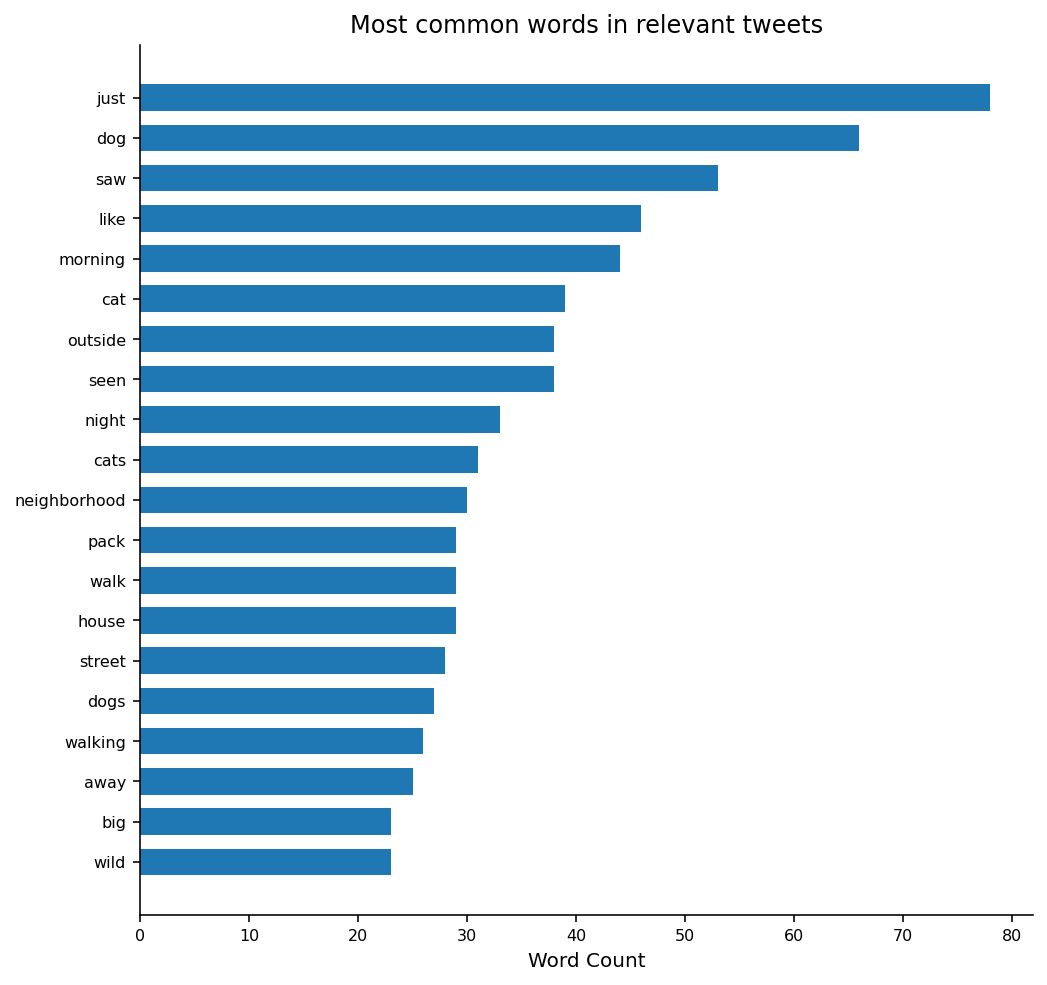

In [27]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.barh(rel_words, rel_counts, height=.66)
ax.set_title('Most common words in relevant tweets')
ax.set_xlabel('Word Count')
ax.tick_params(axis='both', labelsize=8)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

Lets look at words that are in both the most common relevant and irrelevant tweets

In [28]:
rel_words_set = set(rel_words)
irrel_words_set = set(irrel_words)
words_in_both = rel_words_set.intersection(irrel_words_set)
words_in_both

{'just', 'like'}

Lets look at the most common words that are only in the irrelevant tweets

In [29]:
only_irrel_words = irrel_words_set - rel_words_set
print(only_irrel_words)

{'weekend', 'today', 'news', 'got', 'stories', 'took', 'missed', 'time', 'rounded', 'sunday', 'san', 'break', 'new', 'wile', 'saturday', 'worry', 'know', 'norcal'}


Might be a good idea to remove some of these words. Probably would want to remove the nouns:
- indian
- ducks
- game
- arizona
- school
- nhl
- win (even though its not a noun im assuming its sports related)

### Visualize relevant and irrelevant common words together

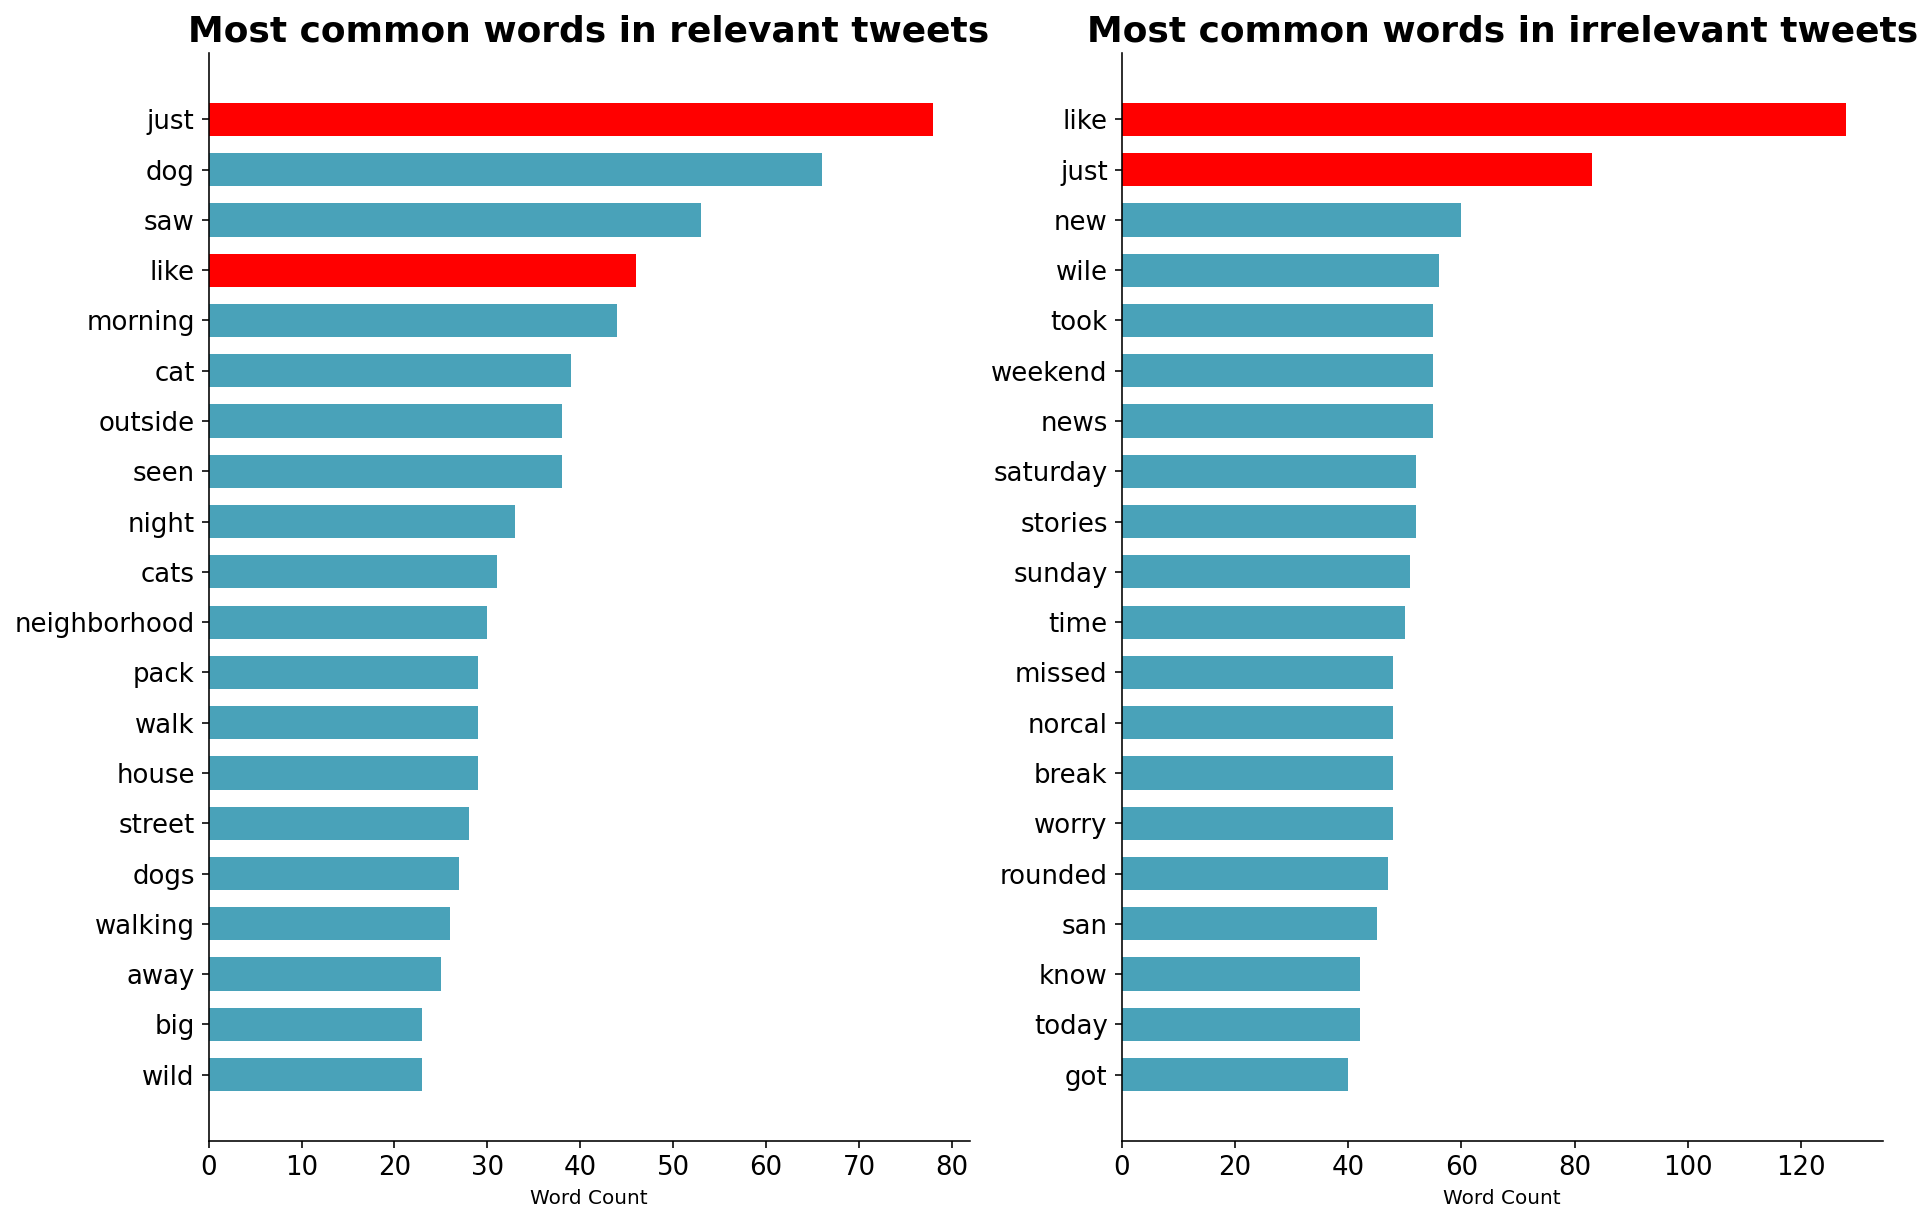

In [30]:
fig, axes = plt.subplots(ncols=2,figsize=(15, 10))
DEFAULT_COLOR = '#49a2b9'
MATCHING_COLOR = 'red'

# Relevant tweets

rel_colors = []
for word in rel_words:
    if word in words_in_both:
        rel_colors.append(MATCHING_COLOR)
    else:
        rel_colors.append(DEFAULT_COLOR)

axes[0].barh(rel_words, rel_counts, height=.66, color=rel_colors)
axes[0].set_title('Most common words in relevant tweets', size=18, weight='bold')
axes[0].set_xlabel('Word Count')
axes[0].tick_params(axis='both', labelsize=13)

axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)

# Irrelevant tweets

irrel_colors = []
for word in irrel_words:
    if word in words_in_both:
        irrel_colors.append(MATCHING_COLOR)
    else:
        irrel_colors.append(DEFAULT_COLOR)

axes[1].barh(irrel_words, irrel_counts, height=.66, color=irrel_colors)
axes[1].set_title('Most common words in irrelevant tweets', size=18, weight='bold')
axes[1].set_xlabel('Word Count')
axes[1].tick_params(axis='both', labelsize=13)

axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)

plt.savefig('../images/common_words.png', transparent=True)
plt.show()

# Reclassify tweets

In [31]:
from utility.classify_tweets import *
pd.set_option("display.max_colwidth", None)

In [32]:
classification_values = classify_tweets(df['tweet'], '../bayes_model/best_bayes_pipeline.pkl')

/Users/Isaacbolo/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [33]:
df['rel'] = classification_values

In [34]:
df[['tweet', 'rel']].sample(5)

,tweet,rel
1294,"@redwyrmofficial @Dungeonlibrary That's awesome! The ""biggest"" wild animals around us that I've seen are coyotes, but our friends who live a short 10 minute drive from us get bears in their backyard almost every day, and have had bobcats as well.",1.0
1827,"@BenHWinters The books I really cherish are best left alone. I don't want to turn, say, Allen Steele's brilliant Coyote into a show. His politics aren't mine, but they can exist in harmony inside my head, 47 light years away. On twitter, it would dissolve into a complete shitshow.",0.0
1660,"@Quintuga @steveolivas ""The humans have what appears to be a Canid although the coyotes view it as more meeting the description of a member of the order Rodentia, and rodents constitute the coyote's primary source of protein.""",0.0
765,the coyotes in this neighborhood need to stfu...,0.0
385,@margieacsa @NatlBlueRibbon @lc_coyotes Thank you @margieacsa - This award reminds us of our path forward- We do all we do for our amazing scholars! I am #CESDproud!,0.0


In [35]:
df['relevant'] = classification_values

In [36]:
df.tail()

,date,time,tweet,tweet_id,hashtags,user_id,username,location,num_followers,geo_enabled,long,lat,relevant,neg_sent_score,neu_sent_score,pos_sent_score,compound_sent_score,sent_class,rel
1895,2021-12-28,19:00:22,@cutsclothing bring back the the coyote AO jogger and when is the pacific blue coming back to stock,1.475904e+18,[],2.963907e+08,TunTun243,"Kerman, CA",180,True,NaN,NaN,0.0,0.0,1.000,0.000,0.0000,neutral,0.0
1896,2021-12-28,10:55:00,in the mood to go on a 3am hike in the rain &amp; dark &amp; get eaten by a coyote or mountain lion :-),1.475782e+18,[],1.146845e+09,itslexijune,"Bay Area, CA",7853,True,NaN,NaN,0.0,0.0,0.909,0.091,0.3182,positive,0.0
1897,2021-12-28,07:54:22,@RedstoneCo2 looks good!,1.475737e+18,[],1.068005e+18,Citrus_Coyote,Southern California,146,False,NaN,NaN,0.0,0.0,0.385,0.615,0.4926,positive,0.0
1898,2021-12-28,05:53:02,Here's a Carrizo Plains coyote because of course I gotta still give you camera pictures. https://t.co/IvgqNv7L1s,1.475706e+18,[],2.510564e+08,pchrysafis,"Fresno, CA",4402,False,NaN,NaN,0.0,0.0,1.000,0.000,0.0000,neutral,0.0
1899,2021-12-28,05:21:45,@wildnewyorkshow That says more coyote for me with the tapered edges and the overall white. Was it just that one large solid piece and the other two?,1.475698e+18,[],2.510564e+08,pchrysafis,"Fresno, CA",4402,False,NaN,NaN,0.0,0.0,0.942,0.058,0.1531,positive,0.0


In [37]:
df.drop(columns=['new_class', 'rel'], inplace=True)

KeyError: "['new_class'] not found in axis"

In [ ]:
df.to_csv('/Users/Isaacbolo/CDFW/CDFW/twitter/coyotes/data/all_queries.csv', index=False, encoding='utf-8-sig')

# Looking at available long and lat data

In [ ]:
long = df['long']
lat = df['lat']

In [ ]:
long.isnull().sum(), long.notnull().sum()

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
ax.bar(['Null', 'Not Null'], [long.isnull().sum(), long.notnull().sum()], color=['#004c6d', '#7aa6c2'], width=.67)
ax.set_title('Null vs Not Null Longitude and Latitude Counts')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='x', bottom=False)

plt.savefig('../images/count_long_lat.png', transparent=True)
plt.show()